# Chapter 30 - Exercises

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import statsmodels.api as sm
from statsmodels.formula.api import ols

## 30.1

### Answers

* a) => This interpretation doesn't account for the linear effects of the other predictors.
* b) is correct
* c) => Price is a function of 3 predictors.  Having a given price doesn't tell us anything about the inputs to that function.
* d) => The model accounts for 92% of the variability in price -- it doesn't speak at all to fitting data points exactly.

## 30.3

### Answers

* a) Final = 0.256 * Test1 + 0.3912 * Test2 + 0.9015 * Test3 - 6.72
* b) 77.7%  (74.1% when adjusting for number of predictors)
* c) After accounting for the linear effects of the other predictors, a 1 point increase in Test3 score is associated with a 0.9015 point increase on the Final.
* d) It can't be determined from this model.  It may be the case that scores on Test1 and Test3 are associated, and after accounting for Test3's linear effects, there's little linear effect left over from Test1 (that isn't captured within Test3's coefficient.)

## 30.5

### Answers

* a) Price = 9530 * Baths + 139.87 * Sq Ft - 152037
* b) 71.1% (64.6% when accounting for # of predictors)
* c) After accounting for the linear effects of the other predictors, each 1 unit increase in square footage is associated with an average increase of \$139.87 in price.
* d) No.  It's likely that square footage and bathrooms are collinear - such that after we've accounted for the linear effects of square footage, there's not much effect "left over" that is then associated with # of bathrooms.

## 30.7

### Answers

* curve in residuals vs. predicteds
* outliers at right of histogram

## 30.9

### Answers

* a) salary = 0.110 * x1 + 0.053 * x2 + 0.071 * x3 + 0.004 * x4 + 0.065 * x5 + 9.788
* b) \$29,205
* c) t-value = 0.013 => will produce a very high P-value => not significant
* d) remove typing speed, given that it appears to be non-significant
* e) age is likely collinear with one or more of the other predictors in the model (in particular, months of service)

In [2]:
#b
x1 = 120
x2 = 9
x3 = 50
x4 = 60
x5 = 30

salary = 0.110 * x1 + 0.053 * x2 + 0.071 * x3 + 0.004 * x4 + 0.065 * x5 + 9.788

print("salary: {}".format(salary))

salary: 29.205


## 30.11

### Answers

* a) yes: P-value is < 0.0001, reject H0 (beta == 0), support for claim of non-0 coeff
* b) for each 1# increase in weight, average % bf increases by 0.189%
* c) After accounting for the linear effects of waist and height, for each 1# increase in weight, avg % bf decreases by 0.10%.  It's likely that weight is collinear with waist size, so that after factoring in the linear effects of waist size, weight has a _negative_ effect on the overall % bf.
* d) Under this model, the effect of height is not significant.  We're unable to reject the null hypothesis that the height coefficient = 0.  It would probably be good to remove height from the model.

## 30.13

### Answers

* a) Yes: P-value < 0.001. reject H0
* b) For each 1 cm(?) increase in chest size, avg % body fat increases by 0.71%
* c) After accounting for the linear effects of waist and height, with each 1 cm increase in chest size, avg % body fat decreases by 0.23%.
* d) Probably not - they all appear to have significant, non-0 coefficient values.

## 30.15

### Answers

* a) murder + grad + income: R-Squared: 0.664 with income as a significant non-zero slope coefficient; that said, all except the one that excludes murder have fairly high R^2 values
* b) No - some of the coefficients are non-significant, and would be worth consideration for removing.
* c) No - that assumes a causal relationship.  The model doesn't say anything about that.
* d) see below

In [4]:
!head ../data/Fifty_states.txt

In [11]:
data = pd.read_table("../data/Fifty_states.txt", 
                     skiprows=1,
                     names=["state", "murder", "grad", "income", "illiteracy", "life_exp"], 
                     index_col="state")
data.head()

,murder,grad,income,illiteracy,life_exp
state,,,,,
Alabama,15.1,41.3,3624,2.1,69.05
Alaska,11.3,66.7,6315,1.5,69.31
Arizona,7.8,58.1,4530,1.8,70.55
Arkansas,10.1,39.9,3378,1.9,70.66
California,10.3,62.6,5114,1.1,71.71


In [23]:
formula = 'life_exp ~ murder + grad + income + illiteracy'
model = ols(formula, data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               life_exp   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     22.82
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           2.39e-10
Time:                        07:56:42   Log-Likelihood:                -57.463
No. Observations:                  50   AIC:                             124.9
Df Residuals:                      45   BIC:                             134.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     69.4833      1.325     52.427      0.0

In [24]:
formula = 'life_exp ~ grad + income + illiteracy'
model = ols(formula, data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               life_exp   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     10.89
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           1.60e-05
Time:                        07:56:57   Log-Likelihood:                -71.754
No. Observations:                  50   AIC:                             151.5
Df Residuals:                      46   BIC:                             159.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     69.0135      1.741     39.632      0.0

In [25]:
formula = 'life_exp ~ murder + income + illiteracy'
model = ols(formula, data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               life_exp   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     26.92
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           3.34e-10
Time:                        07:57:04   Log-Likelihood:                -59.826
No. Observations:                  50   AIC:                             127.7
Df Residuals:                      46   BIC:                             135.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     71.1638      1.099     64.752      0.0

In [26]:
formula = 'life_exp ~ murder + grad + illiteracy'
model = ols(formula, data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               life_exp   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     30.83
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           4.44e-11
Time:                        07:57:18   Log-Likelihood:                -57.610
No. Observations:                  50   AIC:                             123.2
Df Residuals:                      46   BIC:                             130.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     69.7354      1.222     57.063      0.0

In [27]:
formula = 'life_exp ~ murder + grad + income'
model = ols(formula, data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               life_exp   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     30.30
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           5.78e-11
Time:                        07:57:24   Log-Likelihood:                -57.898
No. Observations:                  50   AIC:                             123.8
Df Residuals:                      46   BIC:                             131.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.1421      1.096     63.979      0.0

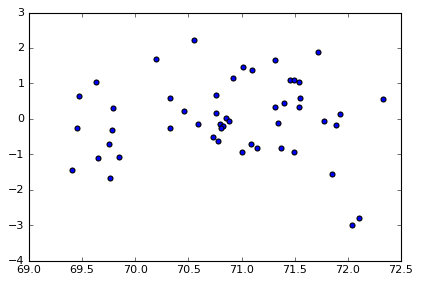

In [32]:
plt.scatter(model.fittedvalues, model.resid)

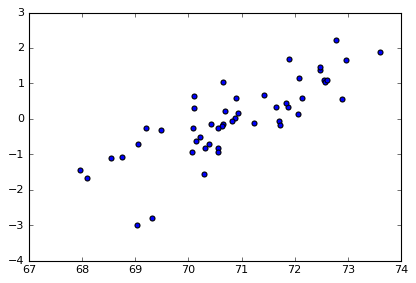

In [33]:
plt.scatter(data.life_exp, model.resid)

In [34]:
# d) notice either some curvature or outliers in the residuals vs. fitted values plot - needs further review

## 30.17

### Answers

* a) yes, assuming the protein, total fat, and carbs values of the new product fall within the range of values used to train this model => protein, fat, and carbs are the three determinants of total calories
* b) the standard deviation of the residual values is 3.14 calories; we'd expect a value predicted using the model to have a sampling distribution around the actual value with a mean of 0 and a std deviation of 3.14 calories; this is very small compared to the standard deviation of the actual calories values
* c) no - given the non-zero s-value, they can't be all 0